In [143]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Definições importantes que vão pro relatório
1. **Risk:** Risk takes on many forms but is broadly categorized as the chance an outcome or investment's actual return will differ from the expected outcome or return. Risk includes the possibility of losing some or all of the original investment.
2. **Beta:** By definition, the market has a beta of 1.0, and individual stocks are ranked according to how much they deviate from the market. A stock that swings more than the market over time has a beta above 1.0. If a stock moves less than the market, the stock's beta is less than 1.0. High-beta stocks are supposed to be riskier but provide a potential for higher returns; low-beta stocks pose less risk but also lower returns.
3. **Volatilidade:** Standard deviation measures the dispersion of data from its expected value. The standard deviation is used in making an investment decision to measure the amount of historical volatility associated with an investment relative to its annual rate of return. It indicates how much the current return is deviating from its expected historical normal returns. For example, a stock that has a high standard deviation experiences higher volatility, and therefore, a higher level of risk is associated with the stock.

### Fuzzy 1 - Compra/Venda de uma *stock*
1. **INPUTS**
    1. Porcentagem de crescimento
        * Universo: Quanto variou o preço da *stock* desde o último pico?
        * Conjunto Fuzzy: baixo, médio, alto
    2. Risco
        * Universo: Qual o risco de se investir nessa *stock* ?
        * Conjunto Fuzzy: baixo, médio, alto
2. **OUTPUTS**
    1. Porcentagem de compra/venda
        * Universo: Qual a porcentagem do *budget* que deve ser gasta com essa ação?
        * Conjunto Fuzzy: muito baixo, baixo, médio, alto e muito alto
3. **RULES**
    * Se a *stock* tem *alto crescimento* e *baixo risco* **ENTÃO** o investimento deve ser *muito alto*
    * Se a *stock* tem *alto crescimento* e *médio risco* **ENTÃO** o investimento deve ser *alto*
    * Se a *stock* tem *alto crescimento* e *alto risco* **ENTÃO** o investimento deve ser *baixo*

    * Se a *stock* tem *médio crescimento* e *baixo risco* **ENTÃO** o investimento deve ser *alto*
    * Se a *stock* tem *médio crescimento* e *médio risco* **ENTÃO** o investimento deve ser *médio*
    * Se a *stock* tem *médio crescimento* e *alto risco* **ENTÃO** o investimento deve ser *baixo*
    
    * Se a *stock* tem *baixo crescimento* e *baixo risco* **ENTÃO** o investimento deve ser *baixo*
    * Se a *stock* tem *baixo crescimento* e *médio risco* **ENTÃO** o investimento deve ser *muito baixo*
    * Se a *stock* tem *baixo crescimento* e *alto risco* **ENTÃO** o investimento deve ser *muito baixo*

define os inputs

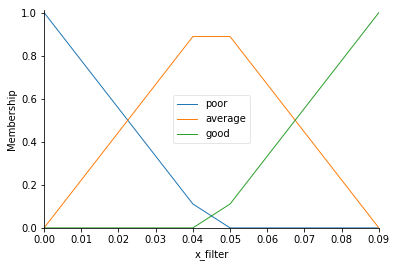

In [130]:
x_filter = ctrl.Antecedent(np.arange(0, 0.10, 0.01), 'x_filter')
x_filter.automf(3)
x_filter.view()

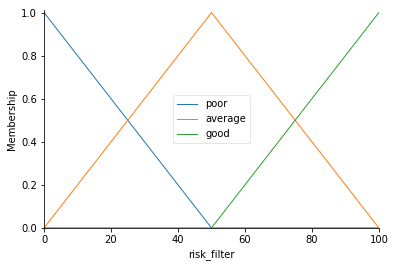

In [134]:
risk_filter = ctrl.Antecedent(np.arange(0,101,1), 'risk_filter')
risk_filter.automf(3)
risk_filter.view()

define os outputs

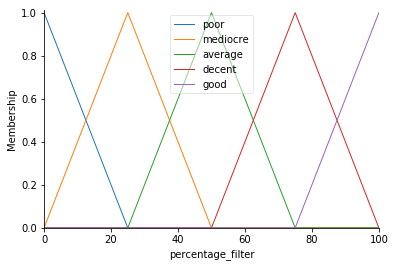

In [142]:
percentage_filter = ctrl.Consequent(np.arange(0,101,1), 'percentage_filter')
percentage_filter.automf(5)
percentage_filter.view()

define as regras

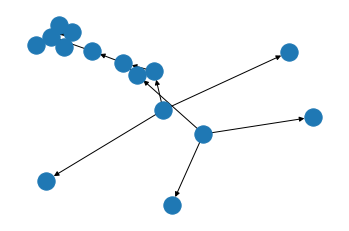

In [144]:
rule1 = ctrl.Rule(x_filter['poor'] & risk_filter['poor'], percentage_filter['good'])
rule2 = ctrl.Rule(x_filter['average'] & risk_filter['average'], percentage_filter['decent'])
rule3 = ctrl.Rule(x_filter['good'] & risk_filter['good'], percentage_filter['mediocre'])
rule4 = ctrl.Rule(x_filter['poor'] & risk_filter['poor'], percentage_filter['decent'])
rule5 = ctrl.Rule(x_filter['average'] & risk_filter['average'], percentage_filter['average'])
rule6 = ctrl.Rule(x_filter['good'] & risk_filter['good'], percentage_filter['mediocre'])
rule7 = ctrl.Rule(x_filter['poor'] & risk_filter['poor'], percentage_filter['mediocre'])
rule8 = ctrl.Rule(x_filter['average'] & risk_filter['average'], percentage_filter['poor'])
rule9 = ctrl.Rule(x_filter['good'] & risk_filter['good'], percentage_filter['poor'])
rule1.view()
plt.show()

cria o controlador fuzzy

In [145]:
calc_pct_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
calc_pct_ctrl

### TESTE DO FUZZY PRO IGU VER

20.83066751972702


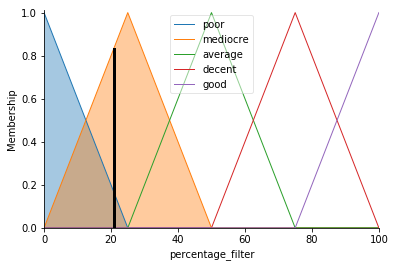

In [147]:
pct = ctrl.ControlSystemSimulation(calc_pct_ctrl)
pct.input['x_filter'] = 200
pct.input['risk_filter'] = 200

pct.compute()

print(pct.output['percentage_filter'])
percentage_filter.view(sim=pct)

### Fuzzy 2 - Classificação do Grau de Risco de uma *stock*
1. **INPUTS**
    1. Média de Variação (famosa volatilidade)
        * Universo: Qual foi a média de variação no valor das *stocks* (em módulo)?
        * Conjunto Fuzzy: baixo, média, alto
    2. Beta
        * Universo: Qual o valor da volatilidade da *stock* com relação a volatilidade do mercado?
        * Conjunto Fuzzy: baixo, alto
2. **OUTPUTS**
    1. Risco
        * Universo: Qual o grau de risco ao se investir nessa *stock* ?
        * Conjunto Fuzzy: baixo, médio, alto
3. **RULES**
    * Se a *stock* apresenta *baixa variação* e um *baixo valor beta* **ENTAO** o risco é baixo
    * Se a *stock* apresenta *baixa variação* e um *alto valor beta* **ENTAO** o risco é médio
    * Se a *stock* apresenta *média variação* e um *baixo valor beta* **ENTAO** o risco é médio
    * Se a *stock* apresenta *média variação* e um *alto valor beta* **ENTAO** o risco é alto
    * Se a *stock* apresenta *alta variação* e um *baixo valor beta* **ENTAO** o risco é médio
    * Se a *stock* apresenta *alta variação* e um *alto valor beta* **ENTAO** o risco é alto

define os inputs

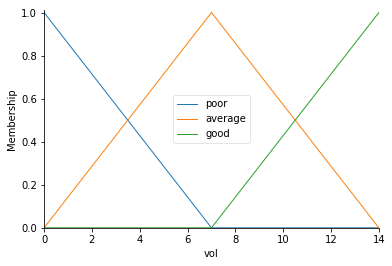

In [67]:
vol =  ctrl.Antecedent(np.arange(0, 15, 1), 'vol')
vol.automf(3)
vol.view()

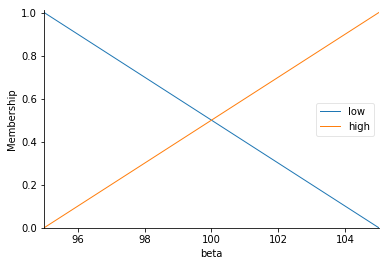

In [117]:
beta = ctrl.Antecedent(np.arange(95, 106, 1), 'beta')
beta['low'] = fuzz.trimf(beta.universe, [95, 95, 105])
beta['high'] = fuzz.trimf(beta.universe, [95, 105, 105])
beta.view()

define os outputs

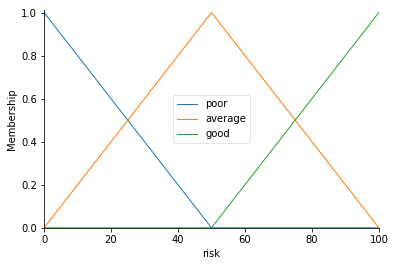

In [92]:
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')
risk.automf(3)
risk.view()

define as regras

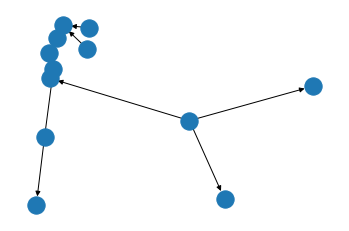

In [112]:
rule1 = ctrl.Rule(vol['poor'] & beta['low'], risk['poor'])
rule2 = ctrl.Rule(vol['poor'] & beta['high'], risk['average'])
rule3 = ctrl.Rule(vol['average'] & beta['low'], risk['average'])
rule4 = ctrl.Rule(vol['average'] & beta['high'], risk['good'])
rule5 = ctrl.Rule(vol['good'] & beta['low'], risk['average'])
rule6 = ctrl.Rule(vol['good'] & beta['high'], risk['good'])
rule1.view()
plt.show()

cria o controlador fuzzy

In [113]:
calc_risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
calc_risk_ctrl

### TESTE DO FUZZY PRO IGU VER

83.33333333333336


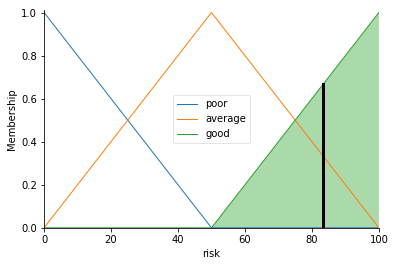

In [120]:
risking = ctrl.ControlSystemSimulation(calc_risk_ctrl)
risking.input['vol'] = 200
risking.input['beta'] = 200

risking.compute()

print(risking.output['risk'])
risk.view(sim=risking)